In [ ]:
import superblockify as sb
import pandas as pd
import networkx as nx
import seaborn as sns
import scipy
import geopandas as gpd

In [90]:
df = pd.read_json("../data/processed/city_partners_public/metadata_cities.json")
df

,Cities,Area,Number of edges,Total road length,Road density,Total estimated population,Population density
0,Amsterdam,197.310440,29363,2773.695725,14.057521,1.116148e+06,5656.812950
1,Southwark,29.935407,9642,754.803041,25.214391,6.546476e+05,21868.672965
2,Vilnius,393.538646,18395,3474.021407,8.827650,9.697433e+05,2464.162799
3,Milan_Municipality,181.755362,25361,2525.412978,13.894572,1.717573e+06,9449.916510
4,Vratsa,15.643470,2619,268.839684,17.185426,4.688643e+04,2997.188369
5,Braga,55.123125,9834,967.107288,17.544493,2.009707e+05,3645.851553
6,Westminster,22.048690,7452,570.219287,25.861821,4.653211e+05,21104.249344
7,Riga,304.120728,23467,2962.878031,9.742440,9.981629e+05,3282.127131
8,Kozani,4.664904,3785,200.506345,42.981881,4.303159e+04,9224.538858
9,Zaragoza,46.546535,9008,783.128039,16.824626,6.429889e+05,13813.894527


In [ ]:
for city in df["Cities"].values:
    G = sb.utils.load_graphml_dtypes(
        f"../data/processed/city_partners_public/graphs_SB/{city}/{city}.graphml"
    )
    print(city, len(list(nx.weakly_connected_components(G))))

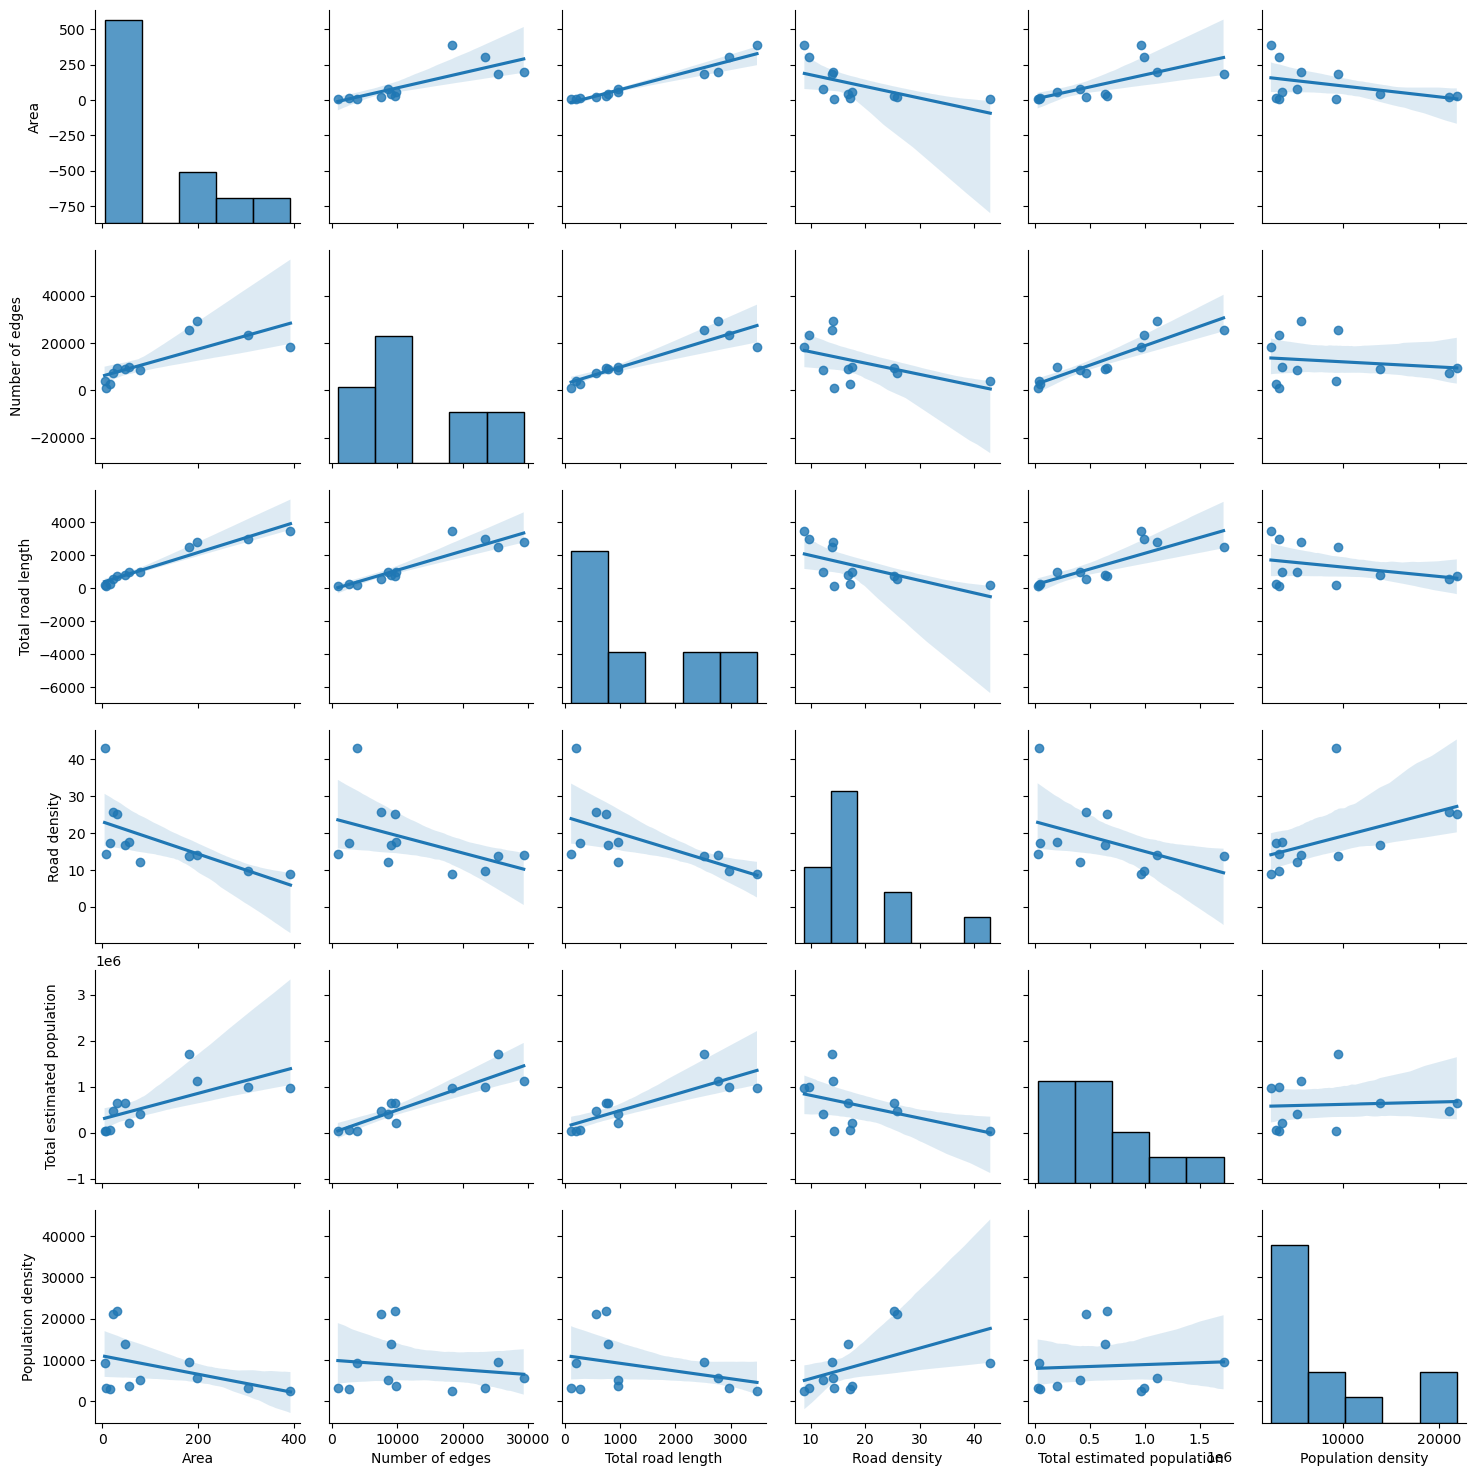

In [ ]:
sns.pairplot(df, kind="reg", diag_kind="hist");

In [91]:
df_filt = df[df["Road density"] < 40]

In [92]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    df_filt["Road density"], df_filt["Population density"]
)
print(r_value)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    df_filt["Area"], df_filt["Road density"]
)
print(r_value)

0.8456822102993697
-0.7119070329732073


In [93]:
df = gpd.read_file(
    "../data/processed/city_partners_public/graphs_SB/Amsterdam/Amsterdam_betweenness.gpkg",
    layer="ltns",
)
len(df)

546

In [94]:
df_filt = df[
    (df["geometry"].area < 921600) & (df["geometry"].area > 25600) & (df["n"] > 5)
]
len(df_filt)

179

In [95]:
df_filt

,classification,value,m,n,length_total,ignore,representative_node_id,mean_edge_betweenness_normal,mean_edge_betweenness_length,mean_edge_betweenness_linear,...,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,node_density_km,intersection_density_km,edge_density_km,street_density_km,street_orientation_order,geometry
2,residential_2,2,6,6,594.894661,False,2311089625,0.000137,0.000098,0.020088,...,5,112.584976,1.120109,0.000000,217.140913,180.950760,21529.328256,20372.337000,0.915414,"MULTIPOLYGON (((626903.195 5803107.649, 626903..."
3,residential_3,3,160,95,14410.715876,False,46357388,0.000413,0.000376,0.079167,...,121,95.730913,1.024943,0.000000,165.507350,149.827706,25106.098897,20180.468900,0.838263,"MULTIPOLYGON (((627055.615 5803137.336, 627056..."
4,residential_4,4,82,48,7547.782091,False,46339795,0.000209,0.000177,0.036819,...,63,100.239072,1.035467,0.015873,180.663050,180.663050,28408.444499,23768.714221,0.831101,"MULTIPOLYGON (((626333.214 5802470.492, 626330..."
5,residential_5,5,234,135,18494.980579,False,46426758,0.000579,0.000541,0.139802,...,197,84.371540,1.020934,0.000000,230.360639,230.360639,31559.374347,28361.990640,0.500513,"MULTIPOLYGON (((627716.848 5804108.428, 627713..."
7,residential_7,7,56,31,3491.000250,False,46385452,0.000500,0.000460,0.123256,...,36,66.680673,1.046537,0.000000,157.803588,106.899205,17770.721432,12219.618688,0.828706,"MULTIPOLYGON (((630655.977 5803916.532, 630653..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,residential_366,366,34,17,2989.808267,False,1511600054,0.000335,0.000301,0.092558,...,18,84.421397,1.213389,0.000000,124.815269,80.762821,21951.395523,11156.907600,0.501060,"MULTIPOLYGON (((633603.105 5803867.172, 633625..."
381,residential_381,381,5,6,274.251241,False,292914491,0.000094,0.000063,0.008420,...,5,54.850248,2.729335,0.000000,93.791490,93.791490,4287.072086,4287.072086,0.915414,"MULTIPOLYGON (((628896.08 5800627.122, 628896...."
402,residential_402,402,13,7,1263.642823,False,12484781098,0.000192,0.000156,0.041259,...,7,119.908456,1.532704,0.000000,82.150757,58.679112,14829.887874,9850.570482,0.873356,"MULTIPOLYGON (((630929.992 5800528.074, 630916..."
421,residential_421,421,10,6,1253.488363,False,7332549064,0.000113,0.000082,0.016602,...,5,125.348836,1.219693,0.000000,102.372778,68.248519,21387.181064,10693.590532,0.915414,"MULTIPOLYGON (((630541.424 5800239.035, 630511..."


In [96]:
df_filt.to_file(
    "../data/processed/city_partners_public/graphs_SB/Amsterdam/Amsterdam_betweenness_filt_ltns.gpkg"
)

2025-04-08 15:45:09,012 |     INFO | raw.py:723 | Created 179 records


In [ ]:
# TODO load partitioner and try to add to the graphml/gpkg the info from which edge is associated to which superblock
# TODO understand how to get the average travel distance increase on the entire graph
# TODO get the share of non-residential streets in superblocks for betweenness partitioner ?